<a href="https://colab.research.google.com/github/Dasika-Vaishnavi/Oceano_Eth/blob/master/Ocean_Climate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

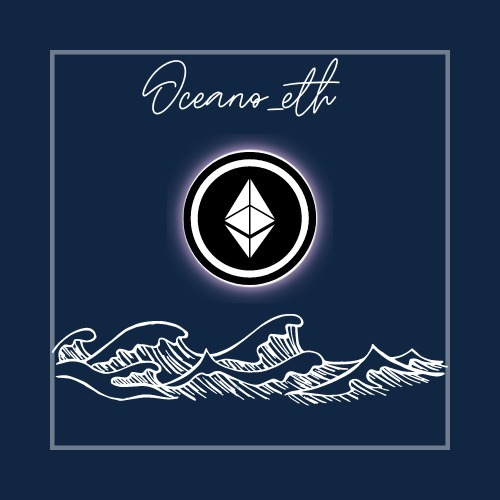

### [NASA Dataset](https://colab.research.google.com/drive/1kpfBMz7jy8ZF7l84jxCK28Sxmtr9LDiN#scrollTo=LQW7uoFoSlrW&line=1&uniqifier=1)

In [ ]:
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as mtpltcm
from mpl_toolkits.mplot3d import Axes3D
import random
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from folium import plugins
from netCDF4 import Dataset
import cartopy.crs as ccrs
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
import skimage
from IPython.display import HTML
import matplotlib.animation as animation
import PIL
from scipy import signal
from scipy.fft import fftshift
from mpl_toolkits.mplot3d import art3d
import os
import os.path
from pathlib import Path
import glob


from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore", category=RuntimeWarning)

### READING AND INFORMATIONS

In [ ]:
PATH_2018 = " " #give path to datasets
PATH_2021 = " "

In [ ]:
READ_2018 = Dataset(PATH_2018)
READ_2021 = Dataset(PATH_2021)

In [ ]:
READ_2018

In [ ]:
READ_2021

In [ ]:
print(READ_2018.variables.keys())

In [ ]:
print(READ_2021.variables.keys())

In [ ]:
GENERAL_KEY_LIST = ['sst']
YEAR_NAME_LIST = ["2018","2021"]

In [ ]:
print(READ_2018.variables["lon"].shape)
print(READ_2021.variables["lon"].shape)

In [ ]:
print(READ_2018.variables["lat"].shape)
print(READ_2021.variables["lat"].shape)

In [ ]:
print(READ_2018.variables["time"].shape)
print(READ_2021.variables["time"].shape)

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params].dimensions)
    print("\n")

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2021.variables[x_params].dimensions)
    print("\n")

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params].shape)
    print("\n")

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params].shape)
    print("\n")

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params].long_name)
    print("\n")

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2021.variables[x_params].long_name)
    print("\n")

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params].datatype)
    print("\n")

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2021.variables[x_params].datatype)
    print("\n")

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2018.variables[x_params])
    print("\n")

In [ ]:
for x_params in GENERAL_KEY_LIST:
    print(x_params)
    print(READ_2021.variables[x_params])
    print("\n")

### ACCESS DATA

In [ ]:
LON_2018 = READ_2018.variables["lon"][:]
LAT_2018 = READ_2018.variables["lat"][:]
TIME_2018 = READ_2018.variables["time"][:]
TDROP_2018 = READ_2018.variables["sst"][0,:,:]


LON_2021 = READ_2021.variables["lon"][:]
LAT_2021 = READ_2021.variables["lat"][:]
TIME_2021 = READ_2021.variables["time"][:]
TDROP_2021 = READ_2021.variables["sst"][0,:,:]

In [ ]:
LAT_TDROP_2018 = TDROP_2018[:,0]
LON_TDROP_2018 = TDROP_2018[0,:]





LAT_TDROP_2021 = TDROP_2021[:,0]
LON_TDROP_2021 = TDROP_2021[0,:]

### MAPPING

In [ ]:
GENERAL_PARAMS_2018 = [TDROP_2018,]
GENERAL_PARAMS_2021 = [TDROP_2021]

In [ ]:
plt.style.use("dark_background")

In [ ]:
for x_climate_params,x_params_name in zip(GENERAL_PARAMS_2021,GENERAL_KEY_LIST):


    figure = plt.figure(figsize=(12,8))

    axis_func = plt.axes(projection=ccrs.Robinson())
    axis_func.set_global()
    axis_func.coastlines(resolution="110m",linewidth=1)
    axis_func.gridlines(linestyle='--',color='black',linewidth=2)

    plt.contourf(LON_2021, LAT_2021, x_climate_params, transform=ccrs.PlateCarree(),cmap="RdGy")
    color_bar_func = plt.colorbar(ax=axis_func, orientation="horizontal",aspect=14, shrink=0.8, extend="max")
    color_bar_func.ax.tick_params(labelsize=10)

    plt.title(READ_2021.variables[x_params_name].long_name + " " + "2021")
    plt.tight_layout()
    plt.show()